### Bitte lade dir die Daten aus GDrive runter und platziere sie im entsprechenden Verzeichnis
https://drive.google.com/drive/folders/1lWrhk-i7g3Hbl5DWO7DFm6LtL7U_eJBH?usp=sharing

# Absatzprognose für einen Supermarkt
Stell dir vor, du bist ein Data Scientist, der für Favorita, eine Supermarktkette in Ecuador, arbeitet. Du hast Zugang zu einem umfangreichen Datensatz, der Verkaufsinformationen, Angaben zu Geschäften und Produkten sowie zusätzliche wirtschaftliche Indikatoren aus den letzten Jahren enthält. Das Management möchte diese Daten nutzen, um fundierte Entscheidungen treffen zu können. Sie sind besonders daran interessiert, herauszufinden, welche Produktfamilien den höchsten Umsatz erzielen, ob in den Daten Anomalien vorhanden sind und insbesondere, ob die Verkäufe für die nächsten 15 Tage präzise vorhergesagt werden können.

Deine Aufgabe ist es, eine tiefgehende Analyse der bereitgestellten Datensätze durchzuführen. Du hast Zugang zu verschiedenen Dateien: 'train.csv' enthält Zeitreihendaten für verschiedene Merkmale wie Geschäftsnummer (store_nbr), Produktfamilie (family) und Informationen über Promotionen (onpromotion). 'test.csv' gibt dir die Möglichkeit, deine Vorhersagemodelle auf Aktualität zu prüfen. Ergänzende Dateien wie 'stores.csv', 'oil.csv' und 'holidays_events.csv' bieten zusätzliche Kontextinformationen, die bei deiner Analyse hilfreich sein könnten.

### Aufgaben

#### Aufgabe 1. Allgemeine Analyse
1. **Daten laden und inspizieren**: Lade den Datensatz und schau dir die ersten Zeilen an. Überprüfe auch, welche Datentypen die einzelnen Spalten haben.
2. **Zusammenfassende Statistik**: Erstelle eine Übersicht der wichtigsten statistischen Kennzahlen, um ein besseres Gefühl für die Daten zu bekommen. Beispiele könnten sein: 
    - Wie viele Produkte werden verkauft
    - Wie viel Umsatz wurde erwirtschaftet
    - Auswertung hinsichtlich verschiedener Dimensionen ( z. B. : Zeit, Store, Produkt)
    - usw. - Überlege dir weitere Kennzahlen die einen guten Einblick geben könnten
3. **Verkaufsanomalien**: Finde ungewöhnliche Spitzen oder Einbrüche im Verkauf und versuche, die Gründe dafür zu ermitteln.


**INFO: Das Datenset findest du im Ilias Ordner. Speichere es unter tsa02 ab. Beginne mit der Analyse von `train.csv` und ziehe bei Bedarf weitere Daten hinzu.**

In [43]:
# Your Code here
import os
import warnings

import pandas as pd

warnings.filterwarnings("ignore")

data_path = "../data/tsa02/store-sales"

train_df = pd.read_csv(os.path.join(data_path, "train.csv"))
test_df = pd.read_csv(os.path.join(data_path, "test.csv"))
holiday_df = pd.read_csv(os.path.join(data_path, "holidays_events.csv"))
oil_df = pd.read_csv(os.path.join(data_path, "oil.csv"))
stores_df = pd.read_csv(os.path.join(data_path, "stores.csv"))

In [44]:
display(
    train_df.head(10),
    test_df.head(3),
    holiday_df.head(3),
    oil_df.head(3),
    stores_df.head(3),
)

# datatypes of the columns
print(f"Train data types: {train_df.dtypes}")
print(f"Test data types: {test_df.dtypes}")
print(f"Holiday data types: {holiday_df.dtypes}")
print(f"Oil data types: {oil_df.dtypes}")
print(f"Stores data types: {stores_df.dtypes}")

# print statistics for train data
pd.set_option("display.float_format", "{:.2f}".format)
print(f"Train data statistics:\n{train_df.describe()}")

id        date  store_nbr        family  sales  onpromotion
0   0  2013-01-01          1    AUTOMOTIVE   0.00            0
1   1  2013-01-01          1     BABY CARE   0.00            0
2   2  2013-01-01          1        BEAUTY   0.00            0
3   3  2013-01-01          1     BEVERAGES   0.00            0
4   4  2013-01-01          1         BOOKS   0.00            0
5   5  2013-01-01          1  BREAD/BAKERY   0.00            0
6   6  2013-01-01          1   CELEBRATION   0.00            0
7   7  2013-01-01          1      CLEANING   0.00            0
8   8  2013-01-01          1         DAIRY   0.00            0
9   9  2013-01-01          1          DELI   0.00            0

id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   

   transferred  
0        False  
1        False  
2        False

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97

store_nbr   city      state type  cluster
0          1  Quito  Pichincha    D       13
1          2  Quito  Pichincha    D       13
2          3  Quito  Pichincha    D        8

Train data types: id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object
Test data types: id              int64
date           object
store_nbr       int64
family         object
onpromotion     int64
dtype: object
Holiday data types: date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object
Oil data types: date           object
dcoilwtico    float64
dtype: object
Stores data types: store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object
Train data statistics:
              id  store_nbr      sales  onpromotion
count 3000888.00 3000888.00 3000888.00   3000888.00
mean  1500443.50      27.50     357.78         2.60
std    866281.89      15.59    1102.00        12.22
min         0.00       1.00       0.00         0.00
25%    750221.75      14.00      

#### Aufgabe 2. Datenbereinigung und -vorverarbeitung
1. **Probleme und Ausreißer erkennen**: Finde Duplikate und Ausreißer im Datensatz und entscheide, wie diese behandelt werden sollen.
2. **Fehlende Daten finden**: Schau nach, ob im Datensatz Werte fehlen, und überlege dir, wie du damit umgehen willst.

In [45]:
# Your Code here
import plotly.express as px

# find duplicates and outliers in train data
print(f"Train data duplicates: {train_df.duplicated().sum()}")
z_threshold = 3

# group by store_nbr and date and sum sales for each store per day
store_sales_df = train_df.groupby(["store_nbr", "date"])["sales"].sum()
store_sales_df = store_sales_df.reset_index()
# sort by date
store_sales_df = store_sales_df.sort_values(by="date")

# calculate z-score for each store sales
store_sales_df["z_score"] = store_sales_df.groupby("store_nbr")["sales"].transform(
    lambda x: (x - x.mean()) / x.std()
)
# find outliers
outliers = store_sales_df[store_sales_df["z_score"].abs() > z_threshold]

store_sales_df = store_sales_df[store_sales_df["z_score"].abs() <= z_threshold]

fig = px.line(
    store_sales_df, x="date", y="sales", color="store_nbr", title="Store Sales"
)
fig.show()

# print(f"Before cleaning: {train_df.shape}")
# print(f"After cleaning: {df_clean.shape}")

Train data duplicates: 0


In [46]:
# plot sales per product family (family and sales columns)
family_sales_df = train_df.groupby("family")["sales"].sum().reset_index()
family_sales_df = family_sales_df.sort_values(by="sales", ascending=False)
fig = px.bar(
    family_sales_df, x="family", y="sales", title="Sales per Family", log_y=True
)
fig.show()

# plot sales per store (store_nbr and sales columns)
store_sales_df = train_df.groupby("store_nbr")["sales"].sum().reset_index()
store_sales_df = store_sales_df.sort_values(by="sales", ascending=False)
store_sales_df["store_nbr"] = store_sales_df["store_nbr"].astype(str)
fig = px.bar(store_sales_df, x="store_nbr", y="sales", title="Sales per Store")
fig.show()

#### Aufgabe 3. Umsatzanalyse
1. **Top 5 Umsatzprodukte**: Finde heraus, welche 5 Kategorien (family) am meisten verkauft werden. Führe ein Detailanalyse für 3 dieser Kategorien durch. D.h. Schau dir ihren zeitlichen verlauf an, untersuche mögliche Korrelationen zu anderen Kategorien.
Verwende diese 3 Produkte auch bei den folgenden Aufgaben.

In [47]:
# Your Code here
# top 5 most sold families
top_families = family_sales_df["family"].head(5).tolist()
print(f"Top 5 families: {top_families}")
top_families = family_sales_df["family"].head(3).tolist()
# filter train data for top 5 families
top_families_df = train_df[train_df["family"].isin(top_families)]


start_date = "2014-01-01"
end_date = "2014-07-31"
top_families_df = top_families_df[
    (top_families_df["date"] >= start_date) & (top_families_df["date"] <= end_date)
]

# look at the time series just for the top products over time sold
top_families_sales_df = (
    top_families_df.groupby(["family", "date"])["sales"].sum().reset_index()
)
fig = px.line(
    top_families_sales_df,
    x="date",
    y="sales",
    color="family",
    title="Top Families Sales",
)
fig.show()

# merge top_families_sales_df with holiday_df and check if type is holiday
top_families_sales_df = top_families_sales_df.merge(holiday_df, on="date", how="left")
top_families_sales_df["is_holiday"] = top_families_sales_df["type"] == "Holiday"

# again plot the top families sales but now highlight holidays
fig = px.line(
    top_families_sales_df,
    x="date",
    y="sales",
    color="family",
    title="Top Families Sales",
)
fig.add_scatter(
    x=top_families_sales_df[top_families_sales_df["is_holiday"]]["date"],
    y=top_families_sales_df[top_families_sales_df["is_holiday"]]["sales"],
    mode="markers",
    marker=dict(color="red", size=8),
    name="Holiday",
)
fig.show()

Top 5 families: ['GROCERY I', 'BEVERAGES', 'PRODUCE', 'CLEANING', 'DAIRY']


#### Aufgabe 4. Zeitreihenanalyse
1. **Zeitreihen zerlegen**: Unterteile die Zeitreihendaten in ihre Bestandteile: Trend, Saisonalität und Rauschen. 
2. **Stationarität überprüfen**: Checke, ob die Zeitreihendaten stationär sind oder nicht.
3. **Auto-Korrelation und partielle Auto-Korrelation**: Erstelle diese Plots, um eventuelle Autokorrelationen in den Zeitreihendaten zu identifizieren.

In [48]:
from IPython.display import Latex, Markdown, display


def load_data(data_path):
    train_df = pd.read_csv(os.path.join(data_path, "train.csv"))
    train_df["date"] = pd.to_datetime(train_df["date"])
    test_df = pd.read_csv(os.path.join(data_path, "test.csv"))
    test_df["date"] = pd.to_datetime(test_df["date"])
    holiday_df = pd.read_csv(os.path.join(data_path, "holidays_events.csv"))
    holiday_df["date"] = pd.to_datetime(holiday_df["date"])
    oil_df = pd.read_csv(os.path.join(data_path, "oil.csv"))
    oil_df["date"] = pd.to_datetime(oil_df["date"])
    stores_df = pd.read_csv(os.path.join(data_path, "stores.csv"))
    return train_df, test_df, holiday_df, oil_df, stores_df


def clean_data(df, z_threshold=3):
    df_clean = df.copy()
    # remove duplicates
    df_clean = df_clean.drop_duplicates()
    # calculate z-score on (store_nbr + family) - date level
    df_clean["z_score"] = df_clean.groupby(["store_nbr", "family"])["sales"].transform(
        lambda x: (x - x.mean()) / x.std()
    )
    df_clean["z_score"] = df_clean["z_score"].fillna(0)

    # remove outliers
    df_clean = df_clean[df_clean["z_score"].abs() <= z_threshold]

    # remove z_score column
    df_clean = df_clean.drop(columns=["z_score"])

    # reset index
    df_clean = df_clean.reset_index(drop=True)

    print(f"Before cleaning: {df.shape}")
    print(f"After cleaning: {df_clean.shape}")

    return df_clean


def get_top_families(df, n=5):
    family_sales_df = df.groupby("family")["sales"].sum().reset_index()
    family_sales_df = family_sales_df.sort_values(by="sales", ascending=False)
    top_families = family_sales_df["family"].head(n).tolist()
    return top_families


def get_top_stores(df, n=5):
    store_sales_df = df.groupby("store_nbr")["sales"].sum().reset_index()
    store_sales_df = store_sales_df.sort_values(by="sales", ascending=False)
    top_stores = store_sales_df["store_nbr"].head(n).tolist()
    return top_stores


def get_store_sales(df):
    store_sales_df = df.groupby(["store_nbr", "date"])["sales"].sum().reset_index()
    store_sales_df = store_sales_df.sort_values(by="date")
    return store_sales_df


def get_family_sales(df):
    family_sales_df = df.groupby(["family", "date"])["sales"].sum().reset_index()
    family_sales_df = family_sales_df.sort_values(by="date")
    return family_sales_df


def plot_sales_per_family(df):
    family_sales_df = df.groupby("family")["sales"].sum().reset_index()
    family_sales_df = family_sales_df.sort_values(by="sales", ascending=False)
    fig = px.bar(
        family_sales_df, x="family", y="sales", title="Sales per Family", log_y=True
    )
    return fig


def plot_sales_per_store(df):
    store_sales_df = df.groupby("store_nbr")["sales"].sum().reset_index()
    store_sales_df = store_sales_df.sort_values(by="sales", ascending=False)
    store_sales_df["store_nbr"] = store_sales_df["store_nbr"].astype(str)
    fig = px.bar(store_sales_df, x="store_nbr", y="sales", title="Sales per Store")
    return fig


def plot_sales_per_family_over_time(df, top_families):
    top_families_df = df[df["family"].isin(top_families)]
    top_families_sales_df = (
        top_families_df.groupby(["family", "date"])["sales"].sum().reset_index()
    )
    fig = px.line(
        top_families_sales_df,
        x="date",
        y="sales",
        color="family",
        title="Top Families Sales",
    )
    return fig


def plot_sales_per_family_over_time_with_holidays(df, top_families, holiday_df):
    top_families_df = df[df["family"].isin(top_families)]
    top_families_sales_df = (
        top_families_df.groupby(["family", "date"])["sales"].sum().reset_index()
    )
    top_families_sales_df = top_families_sales_df.merge(
        holiday_df, on="date", how="left"
    )
    top_families_sales_df["is_holiday"] = top_families_sales_df["type"] == "Holiday"
    fig = px.line(
        top_families_sales_df,
        x="date",
        y="sales",
        color="family",
        title="Top Families Sales",
    )
    fig.add_scatter(
        x=top_families_sales_df[top_families_sales_df["is_holiday"]]["date"],
        y=top_families_sales_df[top_families_sales_df["is_holiday"]]["sales"],
        mode="markers",
        marker=dict(color="red", size=8),
        name="Holiday",
    )
    return fig


def plot_sales_per_store_over_time(df, store_nbr):
    store_family_df = (
        df[(df["store_nbr"] == store_nbr)].groupby("date")["sales"].sum().reset_index()
    )
    store_family_df = store_family_df.sort_values(by="date")
    store_family_df["date"] = pd.to_datetime(store_family_df["date"])
    fig = px.line(
        store_family_df, x="date", y="sales", title=f"Store {store_nbr} Sales"
    )
    return fig


def plot_family_sales_for_store(df, store_nbr):
    store_family_df = df[(df["store_nbr"] == store_nbr)]
    fig = px.line(
        store_family_df,
        x="date",
        y="sales",
        color="family",
        title=f"Store {store_nbr} Family Sales",
    )
    return fig


def slice_df_by_date(df, start_date, end_date):
    return df[(df["date"] >= start_date) & (df["date"] <= end_date)]

In [49]:
train_df, test_df, holiday_df, oil_df, stores_df = load_data(data_path)
cl_train_df = clean_data(train_df)
top_3_families = get_top_families(cl_train_df, n=3)
top_3_stores = get_top_stores(cl_train_df, n=3)
store_sales_df = get_store_sales(cl_train_df)
family_sales_df = get_family_sales(cl_train_df)

display(Markdown("### Top 3 Families"))
print(top_3_families)
display(Markdown("### Top 3 Stores"))
print(top_3_stores)

display(Markdown("### Plots for Sales per Family and Store (before cleaning)"))
fig = plot_sales_per_family(train_df)
fig.show()

fig = plot_sales_per_store(train_df)
fig.show()

display(Markdown("### Plots for Sales per Family and Store (after cleaning)"))
fig = plot_sales_per_family(cl_train_df)
fig.show()

fig = plot_sales_per_store(cl_train_df)
fig.show()

display(Markdown("### Plots for Top Families Sales over Time"))
fig = plot_sales_per_family_over_time(cl_train_df, top_3_families)
fig.show()

display(Markdown("### Plots for Top Families Sales over Time with Holidays"))
fig = plot_sales_per_family_over_time_with_holidays(
    cl_train_df, top_3_families, holiday_df
)
fig.show()

display(Markdown("### Plots for Store Sales over Time"))
fig = plot_sales_per_store_over_time(cl_train_df, 44)
fig.show()

Before cleaning: (3000888, 6)
After cleaning: (2964614, 6)


### Top 3 Families

['GROCERY I', 'BEVERAGES', 'PRODUCE']


### Top 3 Stores

[44, 45, 47]


### Plots for Sales per Family and Store (before cleaning)

### Plots for Sales per Family and Store (after cleaning)

### Plots for Top Families Sales over Time

### Plots for Top Families Sales over Time with Holidays

### Plots for Store Sales over Time

In [50]:
def decompose_time_series(df, period):
    from statsmodels.tsa.seasonal import seasonal_decompose

    result = seasonal_decompose(df["sales"], model="additive", period=period)
    return result

In [51]:
display(Markdown("### Time Series Decomposition"))
fig = plot_family_sales_for_store(cl_train_df, 44)
fig.show()

### Time Series Decomposition

In [52]:
# Finally, I will work with store 44:
# - the total sales for each day.
# - sales for family "GROCERY I" for each day.
# - sales for family "GROCERY II" for each day.
# - sales for family "FROZEN FOODS" for each day.
# - sales for family "SCHOOL AND OFFICE SUPPLIES" for each day.

from plotly.subplots import make_subplots

df_total = (
    cl_train_df[(cl_train_df["store_nbr"] == 44)]
    .groupby("date")["sales"]
    .sum()
    .reset_index()
)
df_grocery1 = (
    cl_train_df[
        (cl_train_df["store_nbr"] == 44) & (cl_train_df["family"] == "GROCERY I")
    ]
    .groupby("date")["sales"]
    .sum()
    .reset_index()
)
df_grocery2 = (
    cl_train_df[
        (cl_train_df["store_nbr"] == 44) & (cl_train_df["family"] == "GROCERY II")
    ]
    .groupby("date")["sales"]
    .sum()
    .reset_index()
)
df_frozen = (
    cl_train_df[
        (cl_train_df["store_nbr"] == 44) & (cl_train_df["family"] == "FROZEN FOODS")
    ]
    .groupby("date")["sales"]
    .sum()
    .reset_index()
)
df_school = (
    cl_train_df[
        (cl_train_df["store_nbr"] == 44)
        & (cl_train_df["family"] == "SCHOOL AND OFFICE SUPPLIES")
    ]
    .groupby("date")["sales"]
    .sum()
    .reset_index()
)

# plot the decomposed time series for each family
plots = make_subplots(
    rows=5,
    cols=1,
    subplot_titles=(
        "Total Sales",
        "GROCERY I",
        "GROCERY II",
        "FROZEN FOODS",
        "SCHOOL AND OFFICE SUPPLIES",
    ),
)

fig_total = px.line(df_total, x="date", y="sales", title="Total Sales")
fig_grocery1 = px.line(df_grocery1, x="date", y="sales", title="GROCERY I")
fig_grocery2 = px.line(df_grocery2, x="date", y="sales", title="GROCERY II")
fig_frozen = px.line(df_frozen, x="date", y="sales", title="FROZEN FOODS")
fig_school = px.line(df_school, x="date", y="sales", title="SCHOOL AND OFFICE SUPPLIES")

plots.add_trace(fig_total.data[0], row=1, col=1)
plots.add_trace(fig_grocery1.data[0], row=2, col=1)
plots.add_trace(fig_grocery2.data[0], row=3, col=1)
plots.add_trace(fig_frozen.data[0], row=4, col=1)
plots.add_trace(fig_school.data[0], row=5, col=1)

plots.update_layout(height=1000, title_text="Store 44 Sales Decomposition")
plots.show()

In [53]:
def check_stationarity(df):
    # check with adfuller, histogram
    from statsmodels.tsa.stattools import adfuller

    result = adfuller(df["sales"])
    mean = df["sales"].mean()
    std = df["sales"].std()
    fig = px.histogram(df, x="sales", title="Sales Histogram")
    return result, fig


def print_adfuller_result(result):
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")

In [54]:
total_result, total_fig = check_stationarity(df_total)
print("Total Sales:")
print_adfuller_result(total_result)
total_fig.show()

Total Sales:
ADF Statistic: -3.016568484665159
p-value: 0.0333758161011323
Critical Values:
	1%: -3.4342978282123258
	5%: -2.8632837412222885
	10%: -2.567698326213784


In [55]:
grocery1_result, grocery1_fig = check_stationarity(df_grocery1)
print("GROCERY I:")
print_adfuller_result(grocery1_result)
grocery1_fig.show()

GROCERY I:
ADF Statistic: -4.477102901473613
p-value: 0.00021624602549950042
Critical Values:
	1%: -3.4343266370047805
	5%: -2.863296457495669
	10%: -2.567705097465208


In [56]:
grocery2_result, grocery2_fig = check_stationarity(df_grocery2)
print("GROCERY II:")
print_adfuller_result(grocery2_result)
grocery2_fig.show()

GROCERY II:
ADF Statistic: -6.552412701355307
p-value: 8.783868698970963e-09
Critical Values:
	1%: -3.4343387651403106
	5%: -2.8633018108486343
	10%: -2.5677079480625067


In [57]:
frozen_result, frozen_fig = check_stationarity(df_frozen)
print("FROZEN FOODS:")
print_adfuller_result(frozen_result)
frozen_fig.show()

FROZEN FOODS:
ADF Statistic: -6.5124970793713945
p-value: 1.091581324364944e-08
Critical Values:
	1%: -3.4343681767217062
	5%: -2.863314793016078
	10%: -2.5677148609281493


In [58]:
school_result, school_fig = check_stationarity(df_school)
print("SCHOOL AND OFFICE SUPPLIES:")
print_adfuller_result(school_result)
school_fig.show()

SCHOOL AND OFFICE SUPPLIES:
ADF Statistic: -6.161305420763643
p-value: 7.163013267994719e-08
Critical Values:
	1%: -3.4343485210432236
	5%: -2.863306117083598
	10%: -2.5677102410843804


### Auto-correlation Plots

#### Total Sales

#### GROCERY I

#### GROCERY II

#### FROZEN FOODS

#### SCHOOL AND OFFICE SUPPLIES

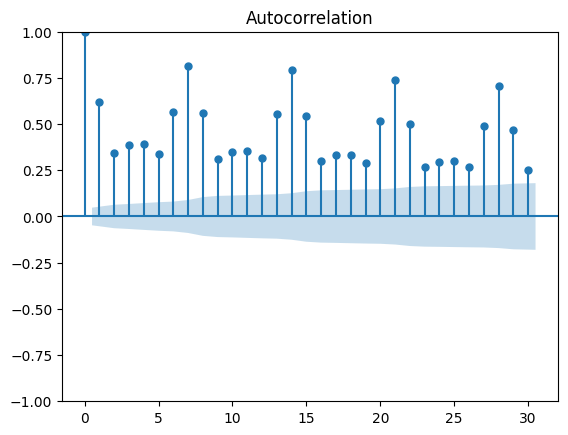

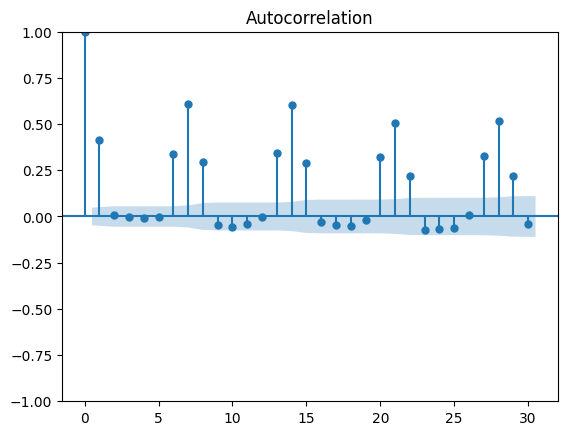

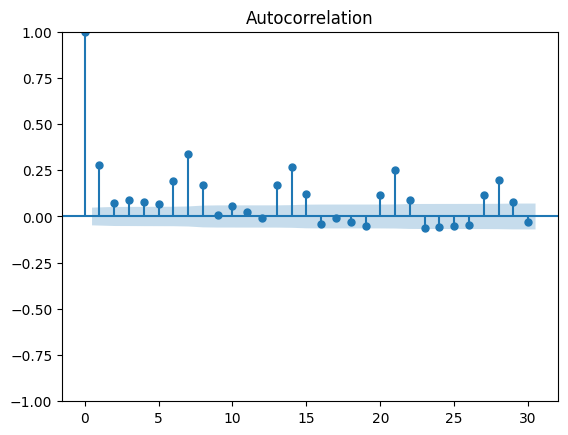

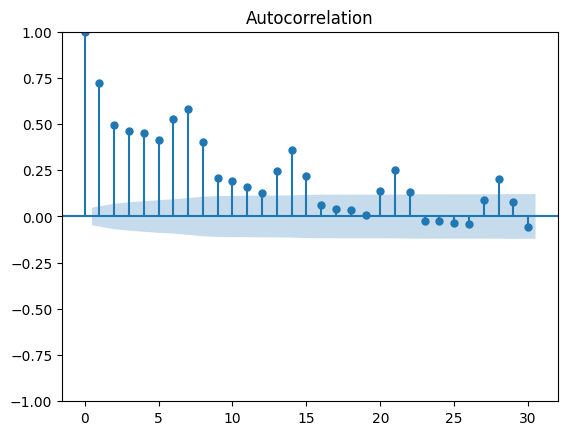

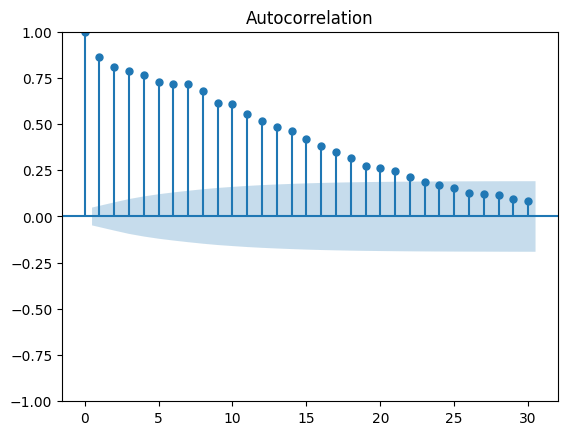

In [59]:
from statsmodels.graphics.tsaplots import plot_acf


def auto_correlation(df):
    fig = plot_acf(df["sales"], lags=30)
    return fig


display(Markdown("### Auto-correlation Plots"))
display(Markdown("#### Total Sales"))
total_acf = auto_correlation(df_total)
total_acf.show()

display(Markdown("#### GROCERY I"))
grocery1_acf = auto_correlation(df_grocery1)
grocery1_acf.show()

display(Markdown("#### GROCERY II"))
grocery2_acf = auto_correlation(df_grocery2)
grocery2_acf.show()

display(Markdown("#### FROZEN FOODS"))
frozen_acf = auto_correlation(df_frozen)
frozen_acf.show()

display(Markdown("#### SCHOOL AND OFFICE SUPPLIES"))
school_acf = auto_correlation(df_school)
school_acf.show()

### Partial Auto-correlation Plots

#### Total Sales

#### GROCERY I

#### GROCERY II

#### FROZEN FOODS

#### SCHOOL AND OFFICE SUPPLIES

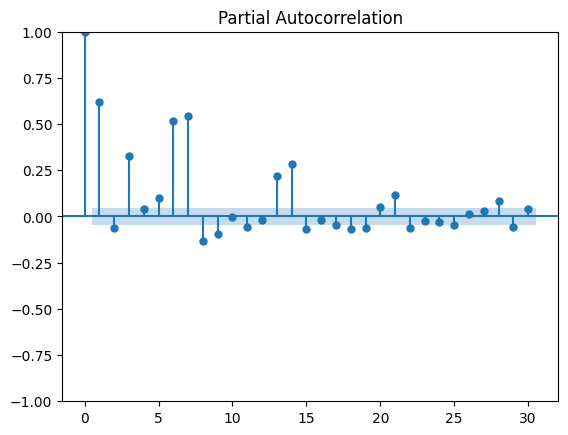

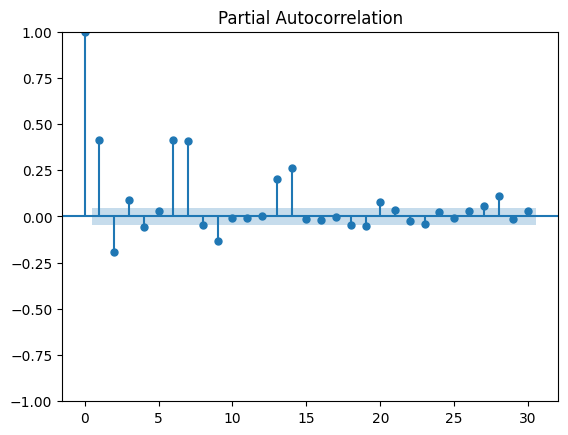

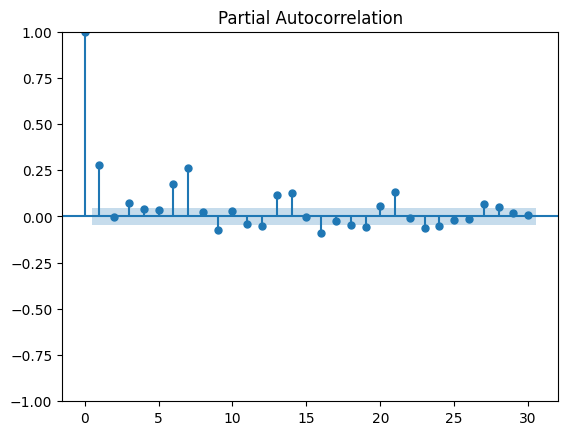

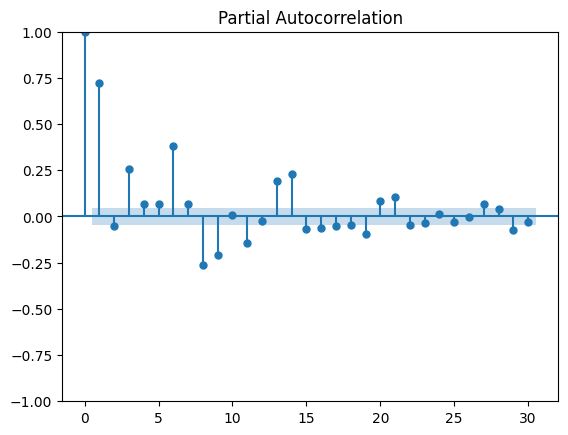

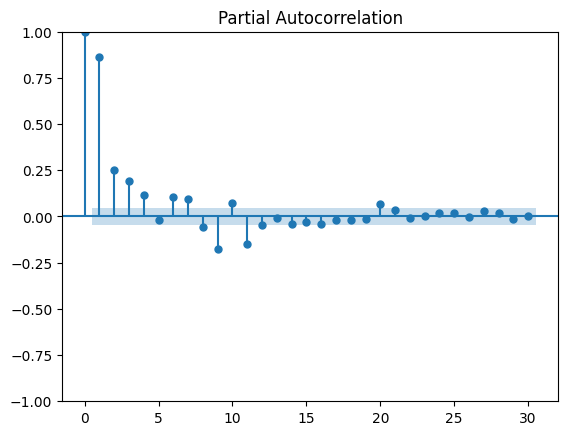

In [60]:
def partial_auto_correlation(df):
    from statsmodels.graphics.tsaplots import plot_pacf

    fig = plot_pacf(df["sales"], lags=30)
    return fig


display(Markdown("### Partial Auto-correlation Plots"))
display(Markdown("#### Total Sales"))
total_pacf = partial_auto_correlation(df_total)
total_pacf.show()

display(Markdown("#### GROCERY I"))
grocery1_pacf = partial_auto_correlation(df_grocery1)
grocery1_pacf.show()

display(Markdown("#### GROCERY II"))
grocery2_pacf = partial_auto_correlation(df_grocery2)
grocery2_pacf.show()

display(Markdown("#### FROZEN FOODS"))
frozen_pacf = partial_auto_correlation(df_frozen)
frozen_pacf.show()

display(Markdown("#### SCHOOL AND OFFICE SUPPLIES"))
school_pacf = partial_auto_correlation(df_school)
school_pacf.show()

#### Aufgabe 5++ Offene Fragen:
Die folgenden Fragen könnten bei Steakholdern aufkommen. Findest du auf diese Fragen Antworten in den Daten? Stütze deine Erkenntnisse mit Visualisierungen

**Umsatztrends und Saisonalität:**

1. Wie entwickeln sich die Gesamtumsätze von Jahr zu Jahr?
2. Wie variieren die Umsätze nach Monat oder Saison? Gibt es spezifische Monate, in denen die Umsätze deutlich ansteigen oder abnehmen?
3. An welchem Wochentag sind die Umsätze am höchsten?

**Leistung von Produkten und Geschäften:**

4. Welche Produkte sind die Spitzenreiter in Bezug auf Verkaufsvolumen und Umsatz?
5. Gibt es Geschäfte, die konstant besser abschneiden als andere? Was könnte zu ihrem Erfolg beitragen?
6. Wie vergleichen sich die Umsatzleistungen zwischen verschiedenen Geschäftsstandorten oder Regionen?

**Auswirkungen von Promotionen:**

7. Wie beeinflussen Promotionen die Umsätze? Steigern sie die Verkaufsvolumen signifikant?
8. Welche Arten von Promotionen (z.B. Rabatte, Kaufe eins, bekomme eins gratis) haben den größten Einfluss auf die Umsätze?
9. Profitieren alle Geschäfte gleichermaßen von Promotionen, oder gibt es einige, die mehr profitieren als andere?

**Einfluss externer Faktoren:**

10. Wie beeinflussen externe Faktoren wie Feiertage oder lokale Ereignisse die Umsätze?
11. Gibt es bemerkenswerte Veränderungen in den Umsatzmustern während großer Sportereignisse oder bei schlechtem Wetter?

**Kundenverhalten:**

12. Was lässt sich aus den Verkaufsdaten über das Kaufverhalten der Kunden ableiten?
13. Gibt es bestimmte Zeiten im Jahr, in denen die Käufe der Kunden signifikant zu- oder abnehmen?
14. Wie könnten wirtschaftliche Indikatoren die Kaufmuster beeinflussen?

**Lagerverwaltung:**

15.  Wie können wir die Lagerbestände basierend auf historischen Verkaufsdaten optimieren, um Kosten zu senken und den Umschlag zu erhöhen?
16.  Gibt es Muster von Produktretouren, die im Supply-Chain-Management adressiert werden müssen?

**Markterweiterung und strategische Planung:**

17. Angesichts der Verkaufsdaten, welche neuen Standorte sollten für Geschäftserweiterungen in Betracht gezogen werden?
18. Gibt es aufkommende Trends, die neue Produktlinien oder Änderungen in den Geschäftsmodellen vorschlagen?

**Technologische Verbesserungen:**

19. Welche Rolle kann Technologie spielen, um das Kundenverhalten und die Umsatztrends besser zu verstehen und vorherzusagen?
20. Wie können Datenanalysewerkzeuge verbessert werden, um tiefere Einblicke in die Verkaufsdaten zu bieten?

**Risikomanagement:**

21. Was sind die potenziellen Risiken in zukünftigen Umsatztrends und wie können diese gemildert werden?
22. Wie widerstandsfähig sind die Umsätze gegenüber wirtschaftlichen Abschwüngen oder Veränderungen in den Verbraucherpräferenzen?


In [61]:
# Your Code here